In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# from tensorflow import keras
# from keras.preprocessing.sequence import TimeseriesGenerator

In [35]:
df = pd.read_csv('SN_ms_tot_V2.0.csv',delimiter=';')
df

,Year,Month,date_frac,mean_sn,std_mean_sn,obs,indicator
0,1749,2,1749.123,-1.0,-1.0,-1,1
1,1749,3,1749.204,-1.0,-1.0,-1,1
2,1749,4,1749.288,-1.0,-1.0,-1,1
3,1749,5,1749.371,-1.0,-1.0,-1,1
4,1749,6,1749.455,-1.0,-1.0,-1,1
...,...,...,...,...,...,...,...
3300,2024,2,2024.124,-1.0,-1.0,700,0
3301,2024,3,2024.206,-1.0,-1.0,934,0
3302,2024,4,2024.288,-1.0,-1.0,973,0
3303,2024,5,2024.373,-1.0,-1.0,1058,0


In [36]:
df['date_final'] =df['Month'].astype(str) + '-' + df['Year'].astype(str)
df

,Year,Month,date_frac,mean_sn,std_mean_sn,obs,indicator,date_final
0,1749,2,1749.123,-1.0,-1.0,-1,1,2-1749
1,1749,3,1749.204,-1.0,-1.0,-1,1,3-1749
2,1749,4,1749.288,-1.0,-1.0,-1,1,4-1749
3,1749,5,1749.371,-1.0,-1.0,-1,1,5-1749
4,1749,6,1749.455,-1.0,-1.0,-1,1,6-1749
...,...,...,...,...,...,...,...,...
3300,2024,2,2024.124,-1.0,-1.0,700,0,2-2024
3301,2024,3,2024.206,-1.0,-1.0,934,0,3-2024
3302,2024,4,2024.288,-1.0,-1.0,973,0,4-2024
3303,2024,5,2024.373,-1.0,-1.0,1058,0,5-2024


In [38]:
df = df[df['mean_sn'] != -1]
df

,Year,Month,date_frac,mean_sn,std_mean_sn,obs,indicator,date_final
5,1749,7,1749.538,135.9,-1.0,-1,1,7-1749
6,1749,8,1749.623,137.9,-1.0,-1,1,8-1749
7,1749,9,1749.707,140.2,-1.0,-1,1,9-1749
8,1749,10,1749.790,143.8,-1.0,-1,1,10-1749
9,1749,11,1749.874,146.4,-1.0,-1,1,11-1749
...,...,...,...,...,...,...,...,...
3294,2023,8,2023.623,124.1,18.2,1247,0,8-2023
3295,2023,9,2023.705,123.9,18.2,1261,0,9-2023
3296,2023,10,2023.790,124.8,18.4,1104,0,10-2023
3297,2023,11,2023.873,127.8,18.8,928,0,11-2023


In [39]:
df = df[df['indicator'] != 0]
df

,Year,Month,date_frac,mean_sn,std_mean_sn,obs,indicator,date_final
5,1749,7,1749.538,135.9,-1.0,-1,1,7-1749
6,1749,8,1749.623,137.9,-1.0,-1,1,8-1749
7,1749,9,1749.707,140.2,-1.0,-1,1,9-1749
8,1749,10,1749.790,143.8,-1.0,-1,1,10-1749
9,1749,11,1749.874,146.4,-1.0,-1,1,11-1749
...,...,...,...,...,...,...,...,...
3288,2023,2,2023.122,117.8,18.9,1014,1,2-2023
3289,2023,3,2023.204,121.1,19.1,1081,1,3-2023
3290,2023,4,2023.286,122.9,19.2,1132,1,4-2023
3291,2023,5,2023.371,124.2,19.2,1240,1,5-2023


In [40]:
df.index = pd.to_datetime(df['date_final'], format = "%m-%Y")
df

,Year,Month,date_frac,mean_sn,std_mean_sn,obs,indicator,date_final
date_final,,,,,,,,
1749-07-01,1749,7,1749.538,135.9,-1.0,-1,1,7-1749
1749-08-01,1749,8,1749.623,137.9,-1.0,-1,1,8-1749
1749-09-01,1749,9,1749.707,140.2,-1.0,-1,1,9-1749
1749-10-01,1749,10,1749.790,143.8,-1.0,-1,1,10-1749
1749-11-01,1749,11,1749.874,146.4,-1.0,-1,1,11-1749
...,...,...,...,...,...,...,...,...
2023-02-01,2023,2,2023.122,117.8,18.9,1014,1,2-2023
2023-03-01,2023,3,2023.204,121.1,19.1,1081,1,3-2023
2023-04-01,2023,4,2023.286,122.9,19.2,1132,1,4-2023


<Axes: xlabel='date_final'>

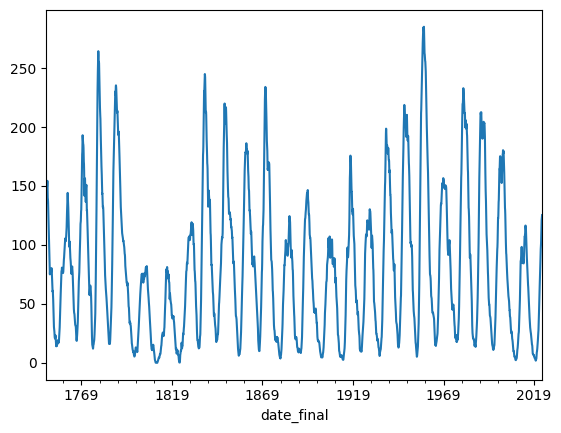

In [41]:
sn = df['mean_sn']
sn.plot()

In [118]:
# sn[:20]

In [97]:
def df_to_Xy(df,window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X),np.array(y)



In [98]:
window_size = 10
X,y = df_to_Xy(sn,window_size)
X.shape,y.shape

((3278, 10, 1), (3278,))

In [117]:
# X[1]

In [99]:
X_train, y_train = X[:2500],y[:2500]
X_val, y_val = X[2500:3000],y[2500:3000]
X_test, y_test = X[3000:],y[3000:]

In [100]:
# X[0]

In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Bidirectional(LSTM(100, activation='tanh'), input_shape=(10, 1)))
model.add(Dense(100,activation='tanh'))
# model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

model.summary()

c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 200)            │        81,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,801 (397.66 KB)

 Trainable params: 101,801 (397.66 KB)

 Non-trainable params: 0 (0.00 B)

In [185]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=300)
model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=['mse'])

In [186]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=1000, callbacks=[es])


Epoch 1/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - loss: 72.1256 - mse: 8956.7373 - val_loss: 81.7324 - val_mse: 11341.2764
Epoch 2/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 59.9754 - mse: 6994.6763 - val_loss: 74.9069 - val_mse: 10056.0967
Epoch 3/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 53.7852 - mse: 6115.5596 - val_loss: 68.9419 - val_mse: 8962.1982
Epoch 4/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 50.3290 - mse: 5713.4688 - val_loss: 63.4641 - val_mse: 7989.9614
Epoch 5/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 44.8497 - mse: 4815.2334 - val_loss: 58.6122 - val_mse: 7138.6655
Epoch 6/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 39.3483 - mse: 4134.2876 - val_loss: 54.3237 - val_mse: 6375.7080
Epoch 7/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 37.1277 - mse: 3901.0444 - val_loss: 50.3254 - val_mse: 5702.0864
Epoch 8/1000
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 34.2982 - mse: 3463.9456 - val_loss: 46.6982 - v

In [187]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


,Train Predictions,Actuals
0,150.615250,147.0
1,137.816986,139.7
2,137.270859,138.8
3,138.029465,136.3
4,129.574585,131.0
...,...,...
2495,282.127106,278.7
2496,269.300751,271.0
2497,260.157196,264.5
2498,254.235031,262.3


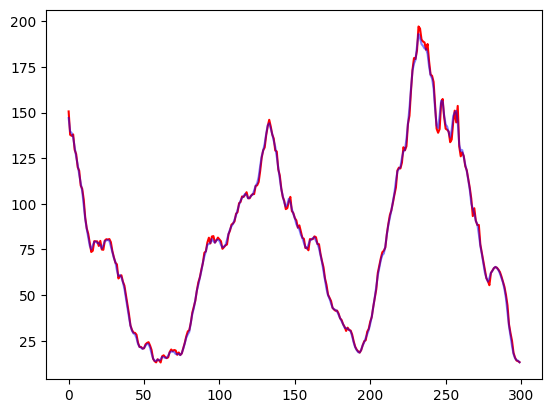

In [188]:
plt.plot(train_results['Train Predictions'][:300],c='r')
plt.plot(train_results['Actuals'][:300],c='b',alpha=0.5)
plt.show()

In [189]:
val_predictions = model.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val})
val_results

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Val Predictions,Actuals
0,254.665131,260.3
1,252.047821,258.1
2,249.378571,255.9
3,246.295929,255.6
4,248.407898,252.9
...,...,...
495,164.972931,164.0
496,164.819595,166.1
497,172.518692,170.6
498,174.406509,174.3


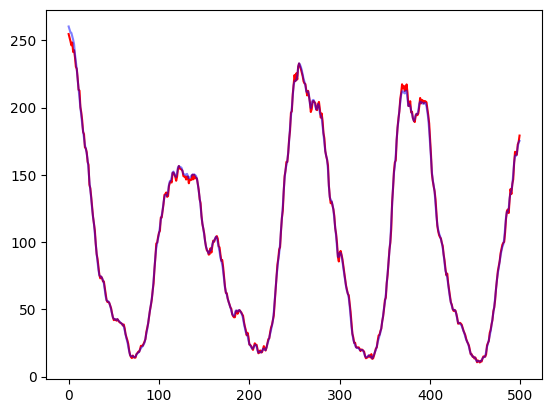

In [190]:
plt.plot(val_results['Val Predictions'],c='r')
plt.plot(val_results['Actuals'],c='b',alpha=0.5)
plt.show()

In [191]:
# X_test[1]

In [192]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results
# test_predictions.shape

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


,Test Predictions,Actuals
0,175.551468,172.9
1,171.945374,172.7
2,176.303696,174.2
3,173.946075,172.8
4,171.138641,168.8
...,...,...
273,116.768089,117.8
274,120.622040,121.1
275,123.961266,122.9
276,123.783257,124.2


In [193]:
max(test_results['Test Predictions']), max(test_results['Actuals']) 

(185.12974548339844, 180.3)

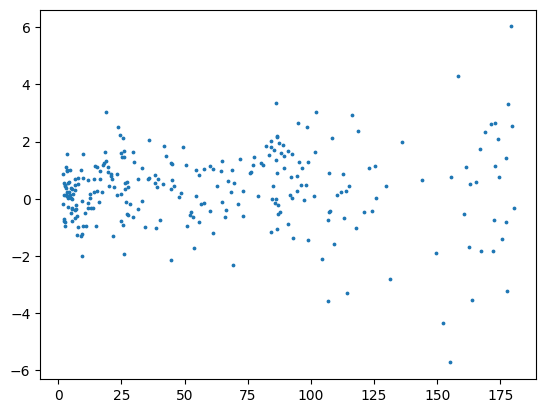

In [194]:
plt.scatter(test_results['Actuals'], test_results['Test Predictions'] - test_results['Actuals'], s=3)

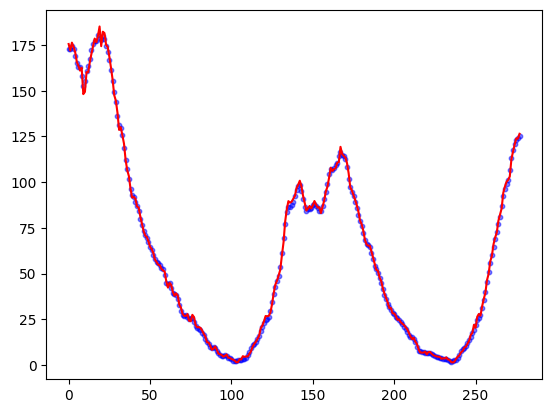

In [195]:
idx = np.arange(0,278,1)
plt.plot(test_results['Test Predictions'],c='r')
plt.scatter(idx,test_results['Actuals'],s=10,c='b',alpha=0.5)
plt.show()

In [200]:
from sklearn.metrics import r2_score
model.evaluate(X_test,y_test), r2_score(test_results['Test Predictions'],test_results['Actuals'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.2487 - mse: 2.8318


([1.0322151184082031, 1.8936110734939575], 0.9992985784125007)

In [164]:
predictions = model.predict(X).flatten()
results = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
results

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Predictions,Actuals
0,149.072372,147.0
1,139.435257,139.7
2,137.769653,138.8
3,139.634995,136.3
4,130.879196,131.0
...,...,...
3273,116.571014,117.8
3274,120.890579,121.1
3275,124.126434,122.9
3276,123.643906,124.2


In [171]:
max(results['Actuals'])

285.0

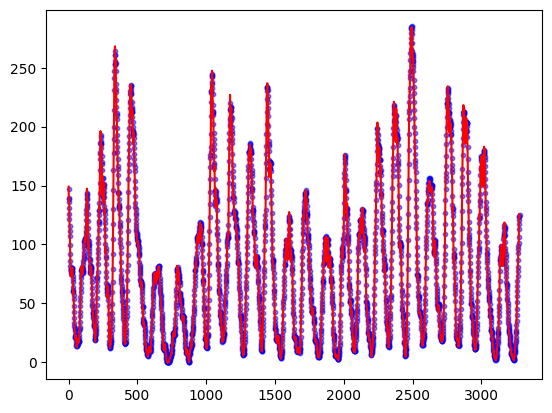

In [165]:
idx = np.arange(0,3278,1)
plt.plot(results['Predictions'],c='r')
plt.scatter(idx,results['Actuals'],s=10,c='b',alpha=0.5)
plt.show()

In [166]:
# X[-1]

In [168]:
X_new = np.vstack((X[-1][1:],y[-1]))
X_new = X_new.reshape(1, 10, 1)
y2 = model.predict(X_new)
y2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[126.06489]], dtype=float32)